In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.17.1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
print("NumPy version:", np.__version__)



NumPy version: 1.26.4


In [ ]:
import sys
print("Python version:", sys.version)



Python version: 3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]


In [ ]:
#Importing Libraries
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten


In [ ]:
import imghdr
import os
from PIL import Image

def convert_to_jpeg(directory):
    for filename in os.listdir(directory):
        filepath = os.path.join(directory, filename)
        img_type = imghdr.what(filepath)

        # Yanlış formatta ya da formatı bilinmiyorsa dönüştür
        if img_type != 'jpeg':
            try:
                with Image.open(filepath) as img:
                    # Dosya ismini yeni jpeg formatına göre oluştur
                    new_filepath = os.path.splitext(filepath)[0] + ".jpg"

                    # Resmi RGB formatına çevir (renkli resim için)
                    img = img.convert('RGB')

                    # JPEG formatında kaydet
                    img.save(new_filepath, 'jpeg')

                    print(f"{filename} dönüştürüldü ve {new_filepath} olarak kaydedildi.")

                    # Eski dosyayı sil
                    os.remove(filepath)
                    print(f"{filename} silindi.")

            except Exception as e:
                print(f"{filename} dönüştürülemedi: {e}")

convert_to_jpeg("/content/drive/MyDrive/Colab Notebooks/Natural Disasters/Volcanic_Eruption")



FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/Natural Disasters/Volcanic_Eruption'

In [ ]:

/content/drive/MyDrive/Colab Notebooks/Natural Disasters/Avalanche
/content/drive/MyDrive/Colab Notebooks/Natural Disasters/Drought
/content/drive/MyDrive/Colab Notebooks/Natural Disasters/Earthquake
/content/drive/MyDrive/Colab Notebooks/Natural Disasters/Flood
/content/drive/MyDrive/Colab Notebooks/Natural Disasters/Wildfires
/content/drive/MyDrive/Colab Notebooks/Natural Disasters/Hurricane_Typhoon
/content/drive/MyDrive/Colab Notebooks/Natural Disasters/Tornado
/content/drive/MyDrive/Colab Notebooks/Natural Disasters/Tsunami
/content/drive/MyDrive/Colab Notebooks/Natural Disasters/Landslide
/content/drive/MyDrive/Colab Notebooks/Natural Disasters/Volcanic_Eruption

In [ ]:
base_dir = '/content/drive/MyDrive/ColabNotebooks/NaturalDisasters'
img_size = 256
batch = 64

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'training',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'validation',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

Found 1735 files belonging to 10 classes.
Using 1388 files for training.
Found 1735 files belonging to 10 classes.
Using 347 files for validation.


In [ ]:
Natural_Disasters_Names = train_ds.class_names
print(Natural_Disasters_Names)

['Avalanche', 'Drought', 'Earthquake', 'Flood', 'Hurricane_Typhoon', 'Landslide', 'Tornado', 'Tsunami', 'Volcanic_Eruption', 'Wildfires']


In [ ]:
import matplotlib.pyplot as plt

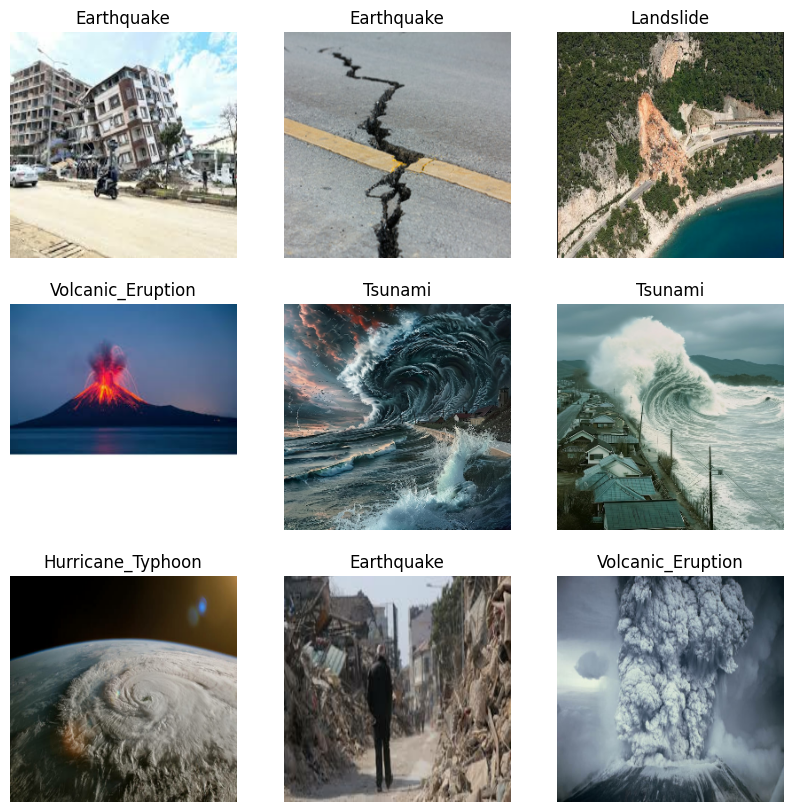

In [ ]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(Natural_Disasters_Names[labels[i]])
        plt.axis('off')

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [ ]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras import layers

data_augmentation = Sequential([
    Input(shape=(img_size, img_size, 3)),  # Explicitly define the input shape here
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])


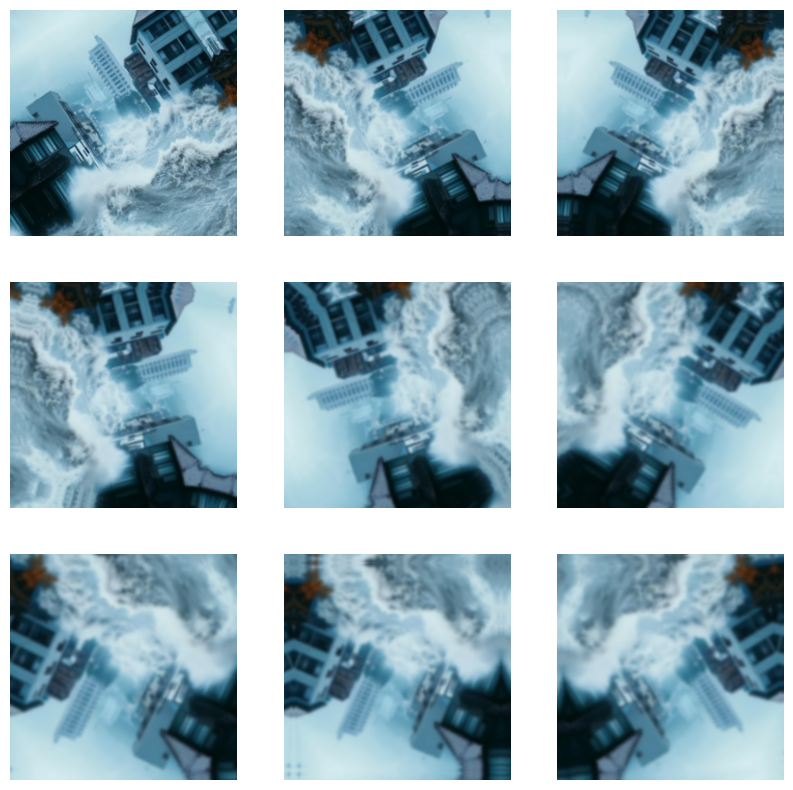

In [ ]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[5].numpy().astype('uint8'))
        plt.axis('off')

In [ ]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(128, 3, padding='same', activation='relu'),
    Conv2D(64, 3, padding='same', activation='relu'),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_9 (Sequential)            │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_5 (Rescaling)              │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 256, 256, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 256, 256, 64)        │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 256, 256, 32)        │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 524288)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │      67,108,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 67,206,122 (256.37 MB)

 Trainable params: 67,206,122 (256.37 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(train_ds, epochs=100, validation_data=val_ds)

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 23s 663ms/step - accuracy: 0.1705 - loss: 10.1571 - val_accuracy: 0.2017 - val_loss: 2.1735
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.2309 - loss: 2.1219 - val_accuracy: 0.3141 - val_loss: 1.9395
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - accuracy: 0.3529 - loss: 1.8650 - val_accuracy: 0.3141 - val_loss: 1.7904
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - accuracy: 0.3575 - loss: 1.7970 - val_accuracy: 0.4006 - val_loss: 1.7340
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - accuracy: 0.4177 - loss: 1.6723 - val_accuracy: 0.4697 - val_loss: 1.5042
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - accuracy: 0.4842 - loss: 1.4738 - val_accuracy: 0.5159 - val_loss: 1.4733
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - accuracy: 0.5036 - loss: 1.4273 - val_accuracy: 0.5389 - val_loss: 1.4205
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - accuracy: 0.5309 - loss: 1.3782 - val_ac

In [ ]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(256,256))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + Natural_Disasters_Names[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome

In [ ]:
classify_images("/content/drive/MyDrive/Data Seience/Proje4/Kuraklık.png")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


'The Image belongs to Drought with a score of 99.98354911804199'

In [ ]:
classify_images("/content/drive/MyDrive/Data Seience/Proje4/Kasırga .png")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


'The Image belongs to Tornado with a score of 75.02421736717224'

In [ ]:
classify_images("/content/drive/MyDrive/Data Seience/Proje4/Volkanik Patlama.png")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


'The Image belongs to Volcanic_Eruption with a score of 99.90490078926086'

In [ ]:
classify_images("/content/drive/MyDrive/Data Seience/Proje4/Orman Yangını.png")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


'The Image belongs to Wildfires with a score of 89.01543617248535'

In [ ]:
classify_images("/content/drive/MyDrive/Data Seience/Proje4/Avalanche.png")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


'The Image belongs to Avalanche with a score of 89.03381824493408'

In [ ]:
model.save('Natural_Disasters_Model.keras')


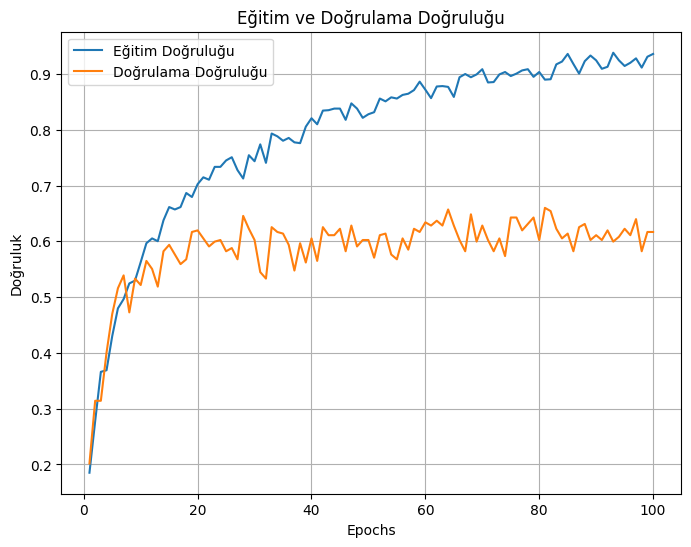

In [100]:
import matplotlib.pyplot as plt

# Eğitim ve doğrulama doğruluk değerlerini al
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Epoch'lar
epochs_range = range(1, len(train_accuracy) + 1)

# Grafik çizdir
plt.figure(figsize=(8, 6))
plt.plot(epochs_range, train_accuracy, label='Eğitim Doğruluğu')
plt.plot(epochs_range, val_accuracy, label='Doğrulama Doğruluğu')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.xlabel('Epochs')
plt.ylabel('Doğruluk')
plt.legend()
plt.grid()
plt.show()


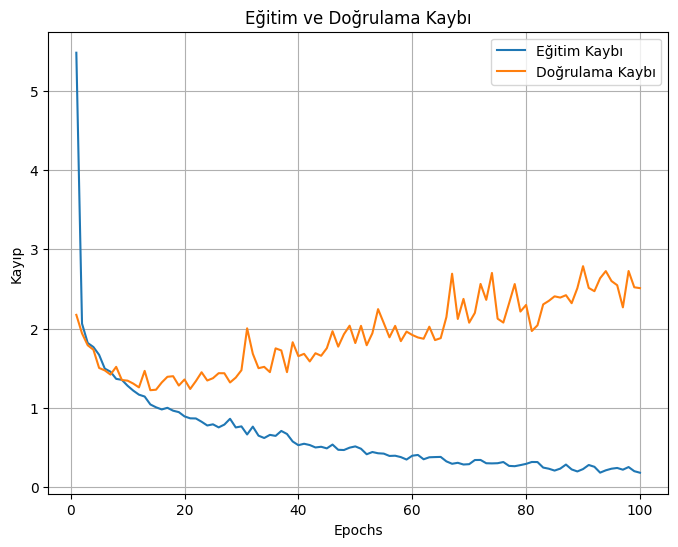

In [101]:
# Eğitim ve doğrulama kaybını al
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Grafik çizdir
plt.figure(figsize=(8, 6))
plt.plot(epochs_range, train_loss, label='Eğitim Kaybı')
plt.plot(epochs_range, val_loss, label='Doğrulama Kaybı')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epochs')
plt.ylabel('Kayıp')
plt.legend()
plt.grid()
plt.show()
